# Assignment 3: Classification
## Hannah Mencer

In [1]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
import seaborn as sns

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
381,LP002229,Male,No,0,Graduate,No,5941,4232.0,296.0,360.0,1.0,Semiurban,Y
300,LP001964,Male,Yes,0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban,N
174,LP001603,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban,N
522,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
192,LP001657,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,N
268,LP001883,Female,No,0,Graduate,NaN,3418,0.0,135.0,360.0,1.0,Rural,N
464,LP002493,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N
465,LP002494,Male,No,0,Graduate,No,6000,0.0,140.0,360.0,1.0,Rural,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
407,LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,Y


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We will use most common value imputation to handle the missing values for these columns. Since Gender, Dependents, Married, and Self_Employed are object datatypes, we'll use the most common value and insert that wherever there is a value of NA. LoanAmount, Loan_Amount_Term, and Credit_History are all float values, so we will replace any value of NA with the mean of each column. 

In [7]:
#Gender

df.groupby(['Gender']).agg({'Gender':'count'})

,Gender
Gender,
Female,112
Male,489


Male occurs more frequently than female, so we will fill the missing values with 'Male'.

In [8]:
df['Gender'].fillna('Male',inplace=True)

In [9]:
#Married

df.groupby(["Married"]).agg({"Married":"count"})

,Married
Married,
No,213
Yes,398


The majority are married, so we'll replace missing values with "Yes".

In [10]:
df["Married"].fillna("Yes",inplace=True)

In [11]:
#Dependents

df.groupby(['Dependents']).agg({'Dependents':'count'})

,Dependents
Dependents,
0,345
1,102
2,101
3+,51


Having 0 dependents is most common, so we will fill every missing value with "0".

In [12]:
df['Dependents'].fillna("0",inplace=True)

In [13]:
#Self_Employed

df.groupby(['Self_Employed']).agg({'Self_Employed':'count'})

,Self_Employed
Self_Employed,
No,500
Yes,82


The majority are not self-employed, so we'll fill every missing value with "No".

In [14]:
df['Self_Employed'].fillna("No",inplace=True)

In [15]:
#LoanAmount
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [16]:
#Loan_Amount_Term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [17]:
#Credit_History
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='ApplicantIncome'>

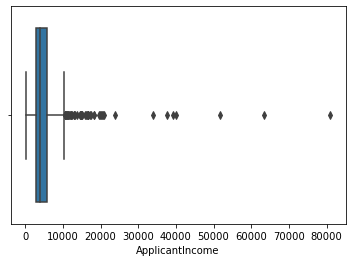

In [20]:
sns.boxplot(x='ApplicantIncome',data=df)

In [21]:
df.sort_values('ApplicantIncome',ascending=False).head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.000000,360.0,0.000000,Rural,N
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.000000,180.0,1.000000,Urban,Y
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.000000,300.0,1.000000,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.000000,180.0,0.000000,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.000000,360.0,1.000000,Semiurban,Y
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.000000,360.0,1.000000,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.000000,360.0,1.000000,Semiurban,N
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.000000,360.0,1.000000,Rural,Y
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.000000,360.0,0.842199,Urban,Y
284,LP001922,Male,Yes,0,Graduate,No,20667,0.0,146.412162,360.0,1.000000,Rural,N


<AxesSubplot:ylabel='Density'>

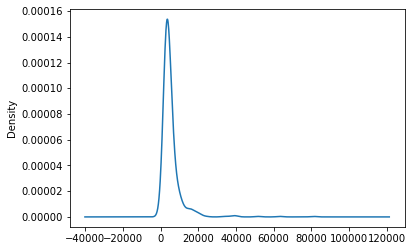

In [22]:
df['ApplicantIncome'].plot.density()

There are many outliers on the max side giving a slight right skew distribution. It is reasonable that someone could make 81K in America, and as that is the highest Applicant Income in this dataset, we should keep the outliers. 

<AxesSubplot:xlabel='CoapplicantIncome'>

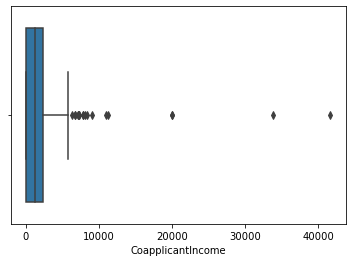

In [23]:
sns.boxplot(x='CoapplicantIncome',data=df)

In [24]:
df.sort_values('CoapplicantIncome',ascending=False).head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,0.842199,Urban,N
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.000000,Urban,N
417,LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.000000,Urban,N
402,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.000000,Semiurban,Y
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.000000,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.000000,Semiurban,N
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.000000,Semiurban,Y
444,LP002424,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,0.842199,Rural,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.000000,Urban,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.000000,Rural,Y


<AxesSubplot:ylabel='Density'>

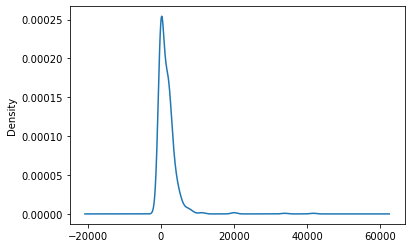

In [25]:
df['CoapplicantIncome'].plot.density()

The highest coaplicant income is $41,667. This is not unreasonably high, so it is probably not an error. The larger values are adding to a right skew, but it's not too significant. Therefore, we will keep the outliers.

<AxesSubplot:xlabel='LoanAmount'>

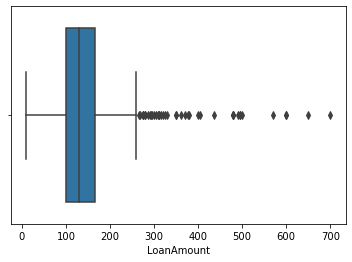

In [26]:
sns.boxplot(x='LoanAmount',data=df)

In [27]:
df.sort_values('LoanAmount',ascending=False).head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.000000,Urban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,0.842199,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.000000,Semiurban,Y
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.000000,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.000000,Rural,N
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.000000,Urban,N
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.000000,Semiurban,Y
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.000000,Semiurban,N
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.000000,Urban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.000000,Rural,N


<AxesSubplot:ylabel='Density'>

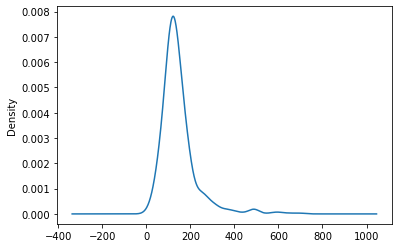

In [28]:
df['LoanAmount'].plot.density()

There is a fairly normal distribution for the loan amounts. The largest loan amount is 700, and that is not too far off from the rest of the loan amounts. Therefore, we will not drop any of the outliers.

Since the data is mostly normal, we don't need to scale or transform it.

# Discretizing

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


<AxesSubplot:>

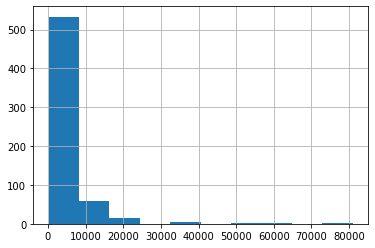

In [31]:
df['ApplicantIncome'].hist()

In [32]:
i=0
test=df.copy()
while i<len(test):
    income=test.at[i,'ApplicantIncome']
    if 0<=income<=11000:
        test.at[i,'ApplicantIncome']=0
    elif 11000<income<=44725:
        test.at[i,'ApplicantIncome']=1
    elif 44725<income<=95375:
        test.at[i,'ApplicantIncome']=2
    elif 95375<income<=182100:
        test.at[i,'ApplicantIncome']=3
    elif 182100<income<=231250:
        test.at[i,'ApplicantIncome']=4
    else:
        test.at[i,'ApplicantIncome']=5      
    i+=1

In [33]:
i=0
df=test.copy()
while i<len(df):
    income=df.at[i,'CoapplicantIncome']
    if 0<=income<=11000:
        df.at[i,'CoapplicantIncome']=0
    elif 11000<income<=44725:        
        df.at[i,'CoapplicantIncome']=1
    elif 44725<income<=95375:
        df.at[i,'CoapplicantIncome']=2
    elif 95375<income<=182100:
        df.at[i,'CoapplicantIncome']=3
    elif 182100<income<=231250:
        df.at[i,'CoapplicantIncome']=4
    else:
        df.at[i,'CoapplicantIncome']=5      
    i+=1

Using brackets from [IRS Data](https://www.irs.gov/newsroom/irs-provides-tax-inflation-adjustments-for-tax-year-2023), we can created different bins. Each bracket gets a different number, so the first bracket is 0, second bracket is 1, etc. Dependending on which bracket the income falls into, we change the value of that row to the corressponding bracket number. We can use the same bins for both the Applicant Income and the Coapplicant Income because the IRS data if for individual tax payers.

<AxesSubplot:>

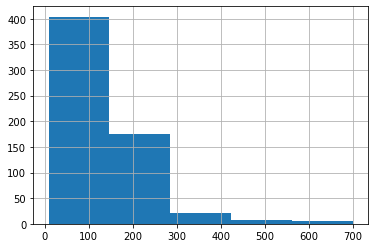

In [40]:
df["LoanAmount"].hist(bins=5)

In [41]:
df['loan_buckets']=pd.cut(df.LoanAmount,[0,100,200,300,700],
                         labels=['loan_0_100','loan_100_200',
                                'loan_200_300','loan_300_700'],
                         include_lowest=True)

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_buckets
0,LP001002,Male,No,0,Graduate,No,0,0.0,146.412162,360.0,1.0,Urban,Y,loan_100_200
1,LP001003,Male,Yes,1,Graduate,No,0,0.0,128.000000,360.0,1.0,Rural,N,loan_100_200
2,LP001005,Male,Yes,0,Graduate,Yes,0,0.0,66.000000,360.0,1.0,Urban,Y,loan_0_100
3,LP001006,Male,Yes,0,Not Graduate,No,0,0.0,120.000000,360.0,1.0,Urban,Y,loan_100_200
4,LP001008,Male,No,0,Graduate,No,0,0.0,141.000000,360.0,1.0,Urban,Y,loan_100_200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0,0.0,71.000000,360.0,1.0,Rural,Y,loan_0_100
610,LP002979,Male,Yes,3+,Graduate,No,0,0.0,40.000000,180.0,1.0,Rural,Y,loan_0_100
611,LP002983,Male,Yes,1,Graduate,No,0,0.0,253.000000,360.0,1.0,Urban,Y,loan_200_300
612,LP002984,Male,Yes,2,Graduate,No,0,0.0,187.000000,360.0,1.0,Urban,Y,loan_100_200


To discretize the loan amounts, I took a look at the distribution from a histogram. Based off of the histogram, I decided that the bins would be for each hundred up until 300. I then put all the values from 300 to 700 in the same bucket because there were less than 50 instances in each subsequent hundred group.

<AxesSubplot:>

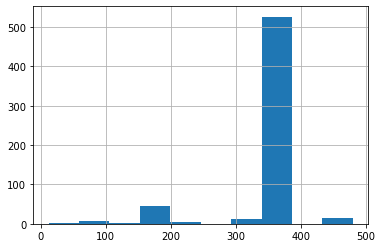

In [35]:
df['Loan_Amount_Term'].hist()

In [43]:
df['term_buckets']=pd.cut(df.Loan_Amount_Term,[0,300, 500],
                         labels=['term_0_360','term_360_500'],
                         include_lowest=True)

In [44]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_buckets,term_buckets
0,LP001002,Male,No,0,Graduate,No,0,0.0,146.412162,360.0,1.0,Urban,Y,loan_100_200,term_300_500
1,LP001003,Male,Yes,1,Graduate,No,0,0.0,128.000000,360.0,1.0,Rural,N,loan_100_200,term_300_500
2,LP001005,Male,Yes,0,Graduate,Yes,0,0.0,66.000000,360.0,1.0,Urban,Y,loan_0_100,term_300_500
3,LP001006,Male,Yes,0,Not Graduate,No,0,0.0,120.000000,360.0,1.0,Urban,Y,loan_100_200,term_300_500
4,LP001008,Male,No,0,Graduate,No,0,0.0,141.000000,360.0,1.0,Urban,Y,loan_100_200,term_300_500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0,0.0,71.000000,360.0,1.0,Rural,Y,loan_0_100,term_300_500
610,LP002979,Male,Yes,3+,Graduate,No,0,0.0,40.000000,180.0,1.0,Rural,Y,loan_0_100,term_0_300
611,LP002983,Male,Yes,1,Graduate,No,0,0.0,253.000000,360.0,1.0,Urban,Y,loan_200_300,term_300_500
612,LP002984,Male,Yes,2,Graduate,No,0,0.0,187.000000,360.0,1.0,Urban,Y,loan_100_200,term_300_500


Most of the loan amounts are 360, so I split the buckets to be everything before 360 and then everything from 360 onwards. 

# Predictors

# LabelEncoding

In [45]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [46]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_buckets,term_buckets
0,LP001002,Male,No,0,Graduate,No,0,0.0,146.412162,360.0,1.0,Urban,Y,loan_100_200,term_300_500
1,LP001003,Male,Yes,1,Graduate,No,0,0.0,128.000000,360.0,1.0,Rural,N,loan_100_200,term_300_500
2,LP001005,Male,Yes,0,Graduate,Yes,0,0.0,66.000000,360.0,1.0,Urban,Y,loan_0_100,term_300_500
3,LP001006,Male,Yes,0,Not Graduate,No,0,0.0,120.000000,360.0,1.0,Urban,Y,loan_100_200,term_300_500
4,LP001008,Male,No,0,Graduate,No,0,0.0,141.000000,360.0,1.0,Urban,Y,loan_100_200,term_300_500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0,0.0,71.000000,360.0,1.0,Rural,Y,loan_0_100,term_300_500
610,LP002979,Male,Yes,3+,Graduate,No,0,0.0,40.000000,180.0,1.0,Rural,Y,loan_0_100,term_0_300
611,LP002983,Male,Yes,1,Graduate,No,0,0.0,253.000000,360.0,1.0,Urban,Y,loan_200_300,term_300_500
612,LP002984,Male,Yes,2,Graduate,No,0,0.0,187.000000,360.0,1.0,Urban,Y,loan_100_200,term_300_500


In [ ]:
features=df[[]]